In [1]:
import numpy as np
import av
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
import os
import pickle
from matplotlib import patches
from functools import reduce

from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras import backend as K
!pwd

f = open("train.txt",'w')


/Users/raminanushiravani/Desktop/mouse_videos


In [127]:
 # 228x658x3
# 192x512x3
mapping = {'front':0,'back':1}
def create_training_dataset(key,target_loc):
    '''
    input files must be sorted 
    outputs a feature/label 
    count is the frame number
    '''
    labels = []
    string_to_write = key
    loc_dict = which_paw(target_loc)
    if loc_dict:
        indicies = loc_dict.keys()
        yep = 1
        for index in indicies:
            label = np.array(target_loc)[index]
            xmin = label[0,0]
            ymin = label[0,1]
            winX = label[1,0]
            winY = label[1,1]
            xmax = min(xmin + winX,658)
            ymax = min(ymin + winY,228)
            location_name = loc_dict[index]
            if location_name != 'unk':
                location_name_index = mapping[location_name]
                label = [xmin,ymin,xmax,ymax,location_name_index] 

                string_to_write += " " + str(xmin) + "," + str(ymin) + "," + str(xmax) + "," + str(ymax) + "," + str(location_name_index)
            else: 
                yep = 0

        if yep:
            f.write(string_to_write + '\n')
        
def which_paw(locations):
    xs = []
    ys = []
    for label in locations:
        xx = label[0][0]
        yy = label[0][1]
        xs.append(xx)
        ys.append(yy)
        
    sortedx = sorted(xs)
    sortedy = sorted(ys)
    if len(sortedx):
        if len(sortedx) == 1:
            label_index_0 = xs.index(sortedx[0])
            return {label_index_0 : 'unk'}

        label_index_0 = xs.index(sortedx[0])
        label_index_1 = xs.index(sortedx[1])

        if len(sortedx) == 2:
            if -sortedx[0] +  sortedx[1] > 100:
                return {label_index_0 : 'front', label_index_1 : 'back'}
            else: 
                return {label_index_0 : 'unk', label_index_1 : 'unk'}

        if len(sortedx) == 3:
            label_index_0 = xs.index(sortedx[0])
            label_index_1 = xs.index(sortedx[1])
            label_index_2 = xs.index(sortedx[2])
            if -sortedx[0] +  sortedx[1] > 100 and -sortedx[0] +  sortedx[2] > 100 :
                return {label_index_0 : 'front', label_index_1 : 'back', label_index_2 : 'back'}
            elif -sortedx[0] +  sortedx[1] < 100 and -sortedx[0] +  sortedx[2] > 100: 

                return {label_index_0 : 'front', label_index_1 : 'front', label_index_2 : 'back'}
            else:
                return {label_index_0 : 'unk', label_index_1 : 'unk', label_index_2 : 'unk'}

def plot_image_bounds(image_data,locations):
    
    '''
    plot image boundaries
    '''
    rects = []
    loc_dict = which_paw(locations)
    indicies = loc_dict.keys()
    for index in indicies:
        label = np.array(locations)[index]
        xx = label[0,0]
        yy = label[0,1]
        winX = label[1,0]
        winY = label[1,1]
        location_name = loc_dict[index]
        rect = patches.Rectangle((xx,yy),winX,winY, edgecolor='r', facecolor="none",label=location_name)
        rects.append(rect)
    figure, ax = plt.subplots(1,figsize=(40,40))
    ax.imshow(image_data)
    
    for rect in rects:
        ax.add_patch(rect)
        rx, ry = rect.get_xy()
        cx = rx + rect.get_width()/2.0
        cy = ry + rect.get_height()/2.0
        ax.annotate(rect.get_label(), (cx, cy), color='black', fontsize=25, ha='center', va='center')

    plt.show()



In [132]:
# Create training dataset
path = "/Users/raminanushiravani/Desktop/mouse_videos"
frames = pickle.load(open(path  + '/walking_frames_w_paw_location.pickle','rb'))

for key in frames.keys():
    print(key )
    target_locations = frames[key]
    create_training_dataset(key,target_locations)
        

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/11.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/13.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/14.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/15.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/16.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/17.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/18.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/19.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102heal

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3097.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3098.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3099.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3100.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3101.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3102.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3103.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3104.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/3105.jpg
/Users/raminanushiravani/Desktop/mouse_videos/

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5370.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5371.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5372.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5373.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5374.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5375.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5376.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5377.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/5378.jpg
/Users/raminanushiravani/Desktop/mouse_videos/

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8477.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8478.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8479.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8480.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8481.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8482.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8483.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8484.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/8485.jpg
/Users/raminanushiravani/Desktop/mouse_videos/

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9614.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9615.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9616.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9617.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9618.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9619.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9620.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9621.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/9622.jpg
/Users/raminanushiravani/Desktop/mouse_videos/

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10606.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10607.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10608.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10609.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10610.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10611.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10612.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10613.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/10614.jpg
/Users/raminanushiravani/Desktop/mous

/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12523.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12524.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12525.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12526.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12527.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12528.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12529.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12530.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/12531.jpg
/Users/raminanushiravani/Desktop/mous

/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/516.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/517.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/518.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/519.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/520.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/521.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/522.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/523.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/524.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/525.jpg
/Users/ram

/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/915.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/916.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/917.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/918.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/919.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/920.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/921.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/922.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/923.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/924.jpg
/Users/ram

/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1473.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1474.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1475.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1476.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1477.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1478.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1479.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1480.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1481.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1482.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1728.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1729.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1730.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1731.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1732.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1733.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1734.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1735.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1736.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1737.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1864.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1865.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1866.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1867.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1868.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1869.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1870.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1871.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1872.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/1873.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2846.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2847.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2848.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2849.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2850.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2851.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2852.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2853.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2854.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/2855.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4567.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4568.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4569.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4570.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4571.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4572.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4573.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4574.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4575.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/4576.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6286.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6287.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6288.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6289.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6290.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6291.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6292.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6293.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6294.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/6372.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8884.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8885.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8886.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8887.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8888.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8889.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8890.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8891.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8892.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_3_20cms_0degUP/frames/8893.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1690.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1691.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1692.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1693.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1694.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1695.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1696.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1697.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1698.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/1699.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3553.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3554.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3555.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3556.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3557.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3558.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3559.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3560.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3561.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/3562.jpg


/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5928.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5929.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5930.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5931.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5932.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5933.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5934.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5935.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5936.jpg
/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5937.jpg


/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1427.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1428.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1429.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1430.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1431.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1432.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1433.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1434.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1435.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2

/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3512.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3513.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3514.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3515.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3516.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3517.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3518.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3519.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/3520.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2

/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6690.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6691.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6692.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6693.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6694.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6695.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6696.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6697.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/6698.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/900.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/901.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/902.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/903.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/904.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/905.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/906.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/907.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/908.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frame

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3373.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3374.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3375.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3376.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3377.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3378.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3379.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3380.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0degUP/frames/3381.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_20cms_0de

/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1581.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1582.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1583.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1584.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1585.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1586.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1587.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1588.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1589.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/1590.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left03

/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3621.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3622.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3623.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3624.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3625.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3626.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3627.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3628.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3629.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left039348_20cms_0degUP/frames/3630.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/left03

/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2991.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2992.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2993.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2994.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2995.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2996.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2997.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2998.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/2999.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/3000.jpg
/Users/raminanushiravani/Desktop/mouse_v

/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5554.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5555.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5556.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5557.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5558.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5559.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5560.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5561.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5562.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/5563.jpg
/Users/raminanushiravani/Desktop/mouse_v

/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8071.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8072.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8073.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8074.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8075.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8076.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8077.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8178.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8179.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/8180.jpg
/Users/raminanushiravani/Desktop/mouse_v

/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10487.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10488.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10489.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10490.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10491.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10492.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10493.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10494.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10495.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/036102_right_20cms_0degUP/frames/10496.jpg
/Users/raminanushiravani/Deskt

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2804.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2805.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2806.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2807.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2808.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2809.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2810.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2811.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2812.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/2813.jpg
/Users/raminanushiravani/Desktop/mouse_videos/inju

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7114.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7115.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7116.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7117.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7118.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7119.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7120.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7121.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7122.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/7123.jpg
/Users/raminanushiravani/Desktop/mouse_videos/inju

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9885.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9886.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9887.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9888.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9889.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9890.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9891.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9892.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9893.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9894.jpg
/Users/raminanushiravani/Desktop/mouse_videos/inju

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12549.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12550.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12551.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12552.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12553.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12554.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12555.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12556.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12557.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/12558.jpg
/Users/raminanushiravani/Desktop/mouse_v

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15450.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15451.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15452.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15453.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15454.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15455.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15456.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15457.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15458.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/15459.jpg
/Users/raminanushiravani/Desktop/mouse_v

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/521.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/522.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/523.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/524.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/525.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/526.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/527.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/528.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/529.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2799.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2800.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2801.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2802.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2803.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2804.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2805.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2806.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/2807.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_righ

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4874.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4875.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4876.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4877.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4878.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4879.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4880.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4881.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4882.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_righ

/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7816.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7817.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7818.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7819.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7820.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7821.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7822.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7823.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/7824.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/right_righ

/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/388.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/389.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/390.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/391.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/392.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/393.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/394.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/395.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continue_20cms_0degUP/frames/396.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/038024_left_continu

/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3063.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3064.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3065.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3066.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3067.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3068.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3069.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3070.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/3071.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2

/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7480.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7481.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7482.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7483.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7484.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7485.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7486.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7487.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/7488.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2

/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10006.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10007.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10008.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10009.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10010.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10011.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10012.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10013.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/10014.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_lef

/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12752.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12753.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12754.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12755.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12756.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12757.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12758.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12759.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_left_ninja_2_20cms_0degUP/frames/12760.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039348_lef

/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2721.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2722.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2723.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2724.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2725.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2726.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2727.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2728.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2729.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/2730.jpg


/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5330.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5331.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5332.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5333.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5334.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5335.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5336.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5337.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5338.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/5339.jpg


/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7932.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7933.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7934.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7935.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7936.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7937.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7938.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7939.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7940.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_left_20cms_0degUP/frames/7941.jpg


/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/901.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/902.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/903.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/904.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/905.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/906.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/907.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/908.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/909.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/910.jpg
/Users/ram

/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4032.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4033.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4034.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4035.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4036.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4037.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4038.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4039.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4040.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/4041.jpg


/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7360.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7361.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7362.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7363.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7364.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7365.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7366.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7367.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7368.jpg
/Users/raminanushiravani/Desktop/mouse_videos/injured/leftleft039348_2_20cms_0degUP/frames/7369.jpg


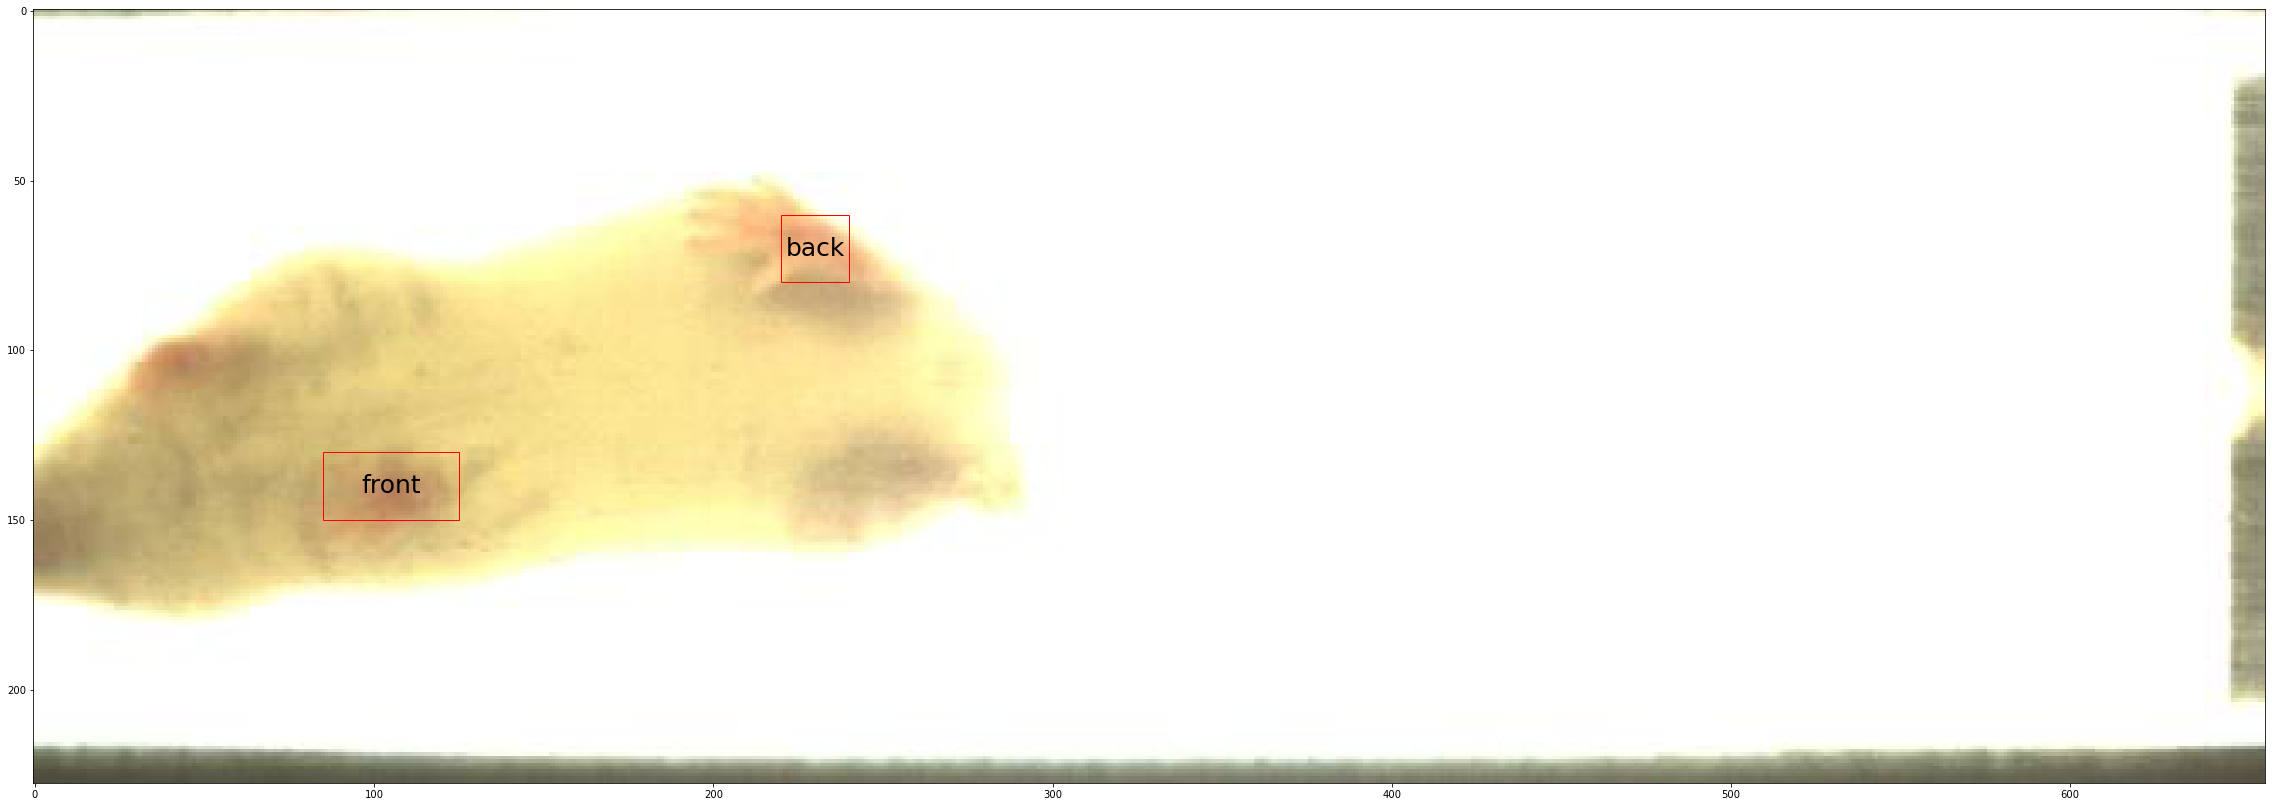

In [120]:
# visualize 
image_path = '/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/29.jpg'
image_data = plt.imread(image_path)
locations = frames[image_path]
plot_image_bounds(image_data,locations)

In [139]:
f = open("train.txt",'r').readlines()
np.random.shuffle(f)
samples = f[0:5000]
ff = open("train_mouse.txt",'w')

for s in samples: 
    ff.write(s)
    
ff.close()
f.close()

AttributeError: 'list' object has no attribute 'close'

['/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/187.jpg 100,90,130,110,0 255,140,275,160,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/right_right_039348_3_20cms_0degUP/frames/4035.jpg 60,90,95,110,0 265,160,320,180,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/healthy/healthy_NSG336_1_20cms_0degUP/frames/5371.jpg 395,50,440,70,0 630,90,650,110,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/4566.jpg 95,80,125,100,0 225,120,270,140,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/rightright_039348_2_20cms_0degUP/frames/1394.jpg 180,70,205,90,0 355,140,380,160,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/injured/039350_left_20cms_0degUP/frames/9743.jpg 70,50,95,70,0 145,80,185,100,0 190,130,215,150,1\n',
 '/Users/raminanushiravani/Desktop/mouse_videos/healthy/036102healthy_continue_20cms_0degUP/frames/1749.jpg 60,60,90,80,0 225,120,270,140,